<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure:

### Exploratory Data Analysis


<div style="color:#00BFFF">

---

##### **Introduction: Uncovering Reliable Proxies for Consumer Spending Behaviour**


<div style="color:#FF7F50">

**1.1. Introduction: The Problem (Why)**

</div>

The current quarterly GDP reports lag in reflecting the dynamic changes in the economy, impacting decision-makers who rely on timely economic data. This project is devised to mitigate this issue by identifying high-frequency, readily updated data proxies that offer quicker insights into consumer expenditure patterns.

<div style="color:#FF7F50">

**1.2. Project Scope and Objectives (What)**

</div>
The project's primary objective is to systematically identify, harmonise, and validate high-frequency data sources as proxies for real-time tracking of consumer expenditure in the United States. The goal is to refine these proxies to provide more immediate data on consumer spending habits, thus bridging the gap caused by the delayed reporting of official GDP figures.

**Key Questions:**

- Which high-frequency data sources can serve as accurate proxies for consumer spending?
- How can we validate these proxies against established measures of consumer expenditure?
- What techniques can we employ to ensure these proxies offer immediate and reliable insights into current consumer spending trends?
- How will we address potential discrepancies between different data sources in terms of scale, units, or reporting standards?
- Are there any unforeseen challenges in harmonizing data frequencies (monthly vs. quarterly) that could impact the accuracy of our analysis?
- How can we ensure the economic relevance of our findings, beyond statistical correlations?
- What contingency plans do we have for dealing with data anomalies or irregularities that might skew our analysis?

<div style="color:#FF7F50">

**1.3. Methodology**

</div>
The methodology is designed to focus on data preparation and validation:

- **Exploratory Data Analysis (EDA)**: To understand the characteristics and quality of the high-frequency monthly indicators and their initial relationships to consumer spending.
- **Proxy Validation**: To establish a correlation with established measures of consumer spending through statistical analysis, ensuring that the proxies are reliable and relevant.

<div style="color:#FF7F50">

**1.4. Assumptions**

</div>

**Data Quality and Relevance:** We operate under the assumption that the high-frequency data from FRED and other sources accurately reflect current economic trends and consumer sentiments. However, there is an inherent risk of data bias or inaccuracy, which could impact the reliability of our findings.

**Predictive Power and Relevance:** While we aim to identify effective proxies for consumer expenditure, there's a risk that these proxies may not fully capture the complexities of consumer behaviour or may not adapt swiftly to sudden economic shifts.

**External Factors:** The project also assumes a stable economic environment. Sudden external shocks (like global events or policy changes) could significantly affect consumer behaviour, potentially reducing the predictive accuracy of our proxies.


<div style="color:#00BFFF">

---

##### Setup Environment and import libraries


In [1]:
# Run the imports file
%matplotlib inline

In [2]:
# ------- Standard Library Imports -------
import warnings
from datetime import datetime
from pprint import pprint
from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
from pandas import NaT
import numpy as np

# Utility and display modules
from IPython.display import display, HTML

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Remove warnings
warnings.filterwarnings("ignore")

# Set the display options
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_46567/2288320038.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# load data generated from [1]M1_clean_and_preprocess.ipynb

# open defn
defn = pd.read_csv("./results/fred/fred_indicator_mappings.csv", index_col=0)

# open joined_dataset.csv
joined_dataset = pd.read_csv(
    "./results/merged_data/joined_dataset_transformed.csv",
    index_col=0,
    parse_dates=False,
)

In [4]:
joined_dataset.tail()

,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
2022-07-01,17684.2,18856.687,15466.3,114.191,1487782.0,678202.0,103.5283,102.2519,102

<div style="color:#00BFFF">

---

##### Initial Correlation Analysis


<div style="color:#FF7F50">

**Why**:

</div>

Given our scenario where we are analyzing a large number of indicators (123) across a lengthy period (1960 to 2023) to find those that best correlate with private consumption expenditure, and we want to `retain NaN` values due to their economic significance, `Spearman's rank correlation` with pairwise deletion seems to be the most appropriate.

It respects the economic significance of NaN values while providing a robust correlation measure. However, we need to ensure to perform a sensitivity analysis to understand the impact of missing values results. Also, consider the potential for non-random missing data and its implications.

<div style="color:#FF7F50">

**What**:

</div>

`Spearman's rank correlation` is non-parametric and does not assume a linear relationship between variables, which can be more appropriate for economic data. It also handles NaN values by default in many implementations, like in Python's Pandas library, where it ignores pairs where either value is NaN.

<div style="color:#FF7F50">

**Benefits**:

</div>

Accounts for monotonic relationships and is less sensitive to outliers (which is relevant given that we have replaced some extreme values with NaN).


The `plot_correlations` function visualizes the strongest positive and negative correlations between various indicators and Personal Consumption Expenditures (PCE). This approach highlights key variables influencing PCE, aiding in identifying factors driving or inhibiting consumption expenditures.

<div style="color:#FF7F50">

**Benefits of Modular Design:**

</div>

- **Organization:** Located in the `utils.visualisation` folder for easy access and code cleanliness.
- **Reusability:** Enhances collaboration and consistency across projects by providing a standardized visualization tool.

<div style="color:#FF7F50">

**Function Highlights:**

</div>

- **Selection:** Identifies top N positively and bottom N negatively correlated indicators with PCE.
- **Visualization:** Uses a horizontal bar plot to contrast positive (skyblue) and negative (salmon) correlations, with a clear demarcation at zero correlation.
- **Purpose:** Facilitates quick identification of significant economic indicators related to PCE, guiding targeted analysis and hypothesis development.

This streamlined visualization strategy effectively communicates the dynamics of economic indicators with PCE, supporting efficient and focused economic analysis.


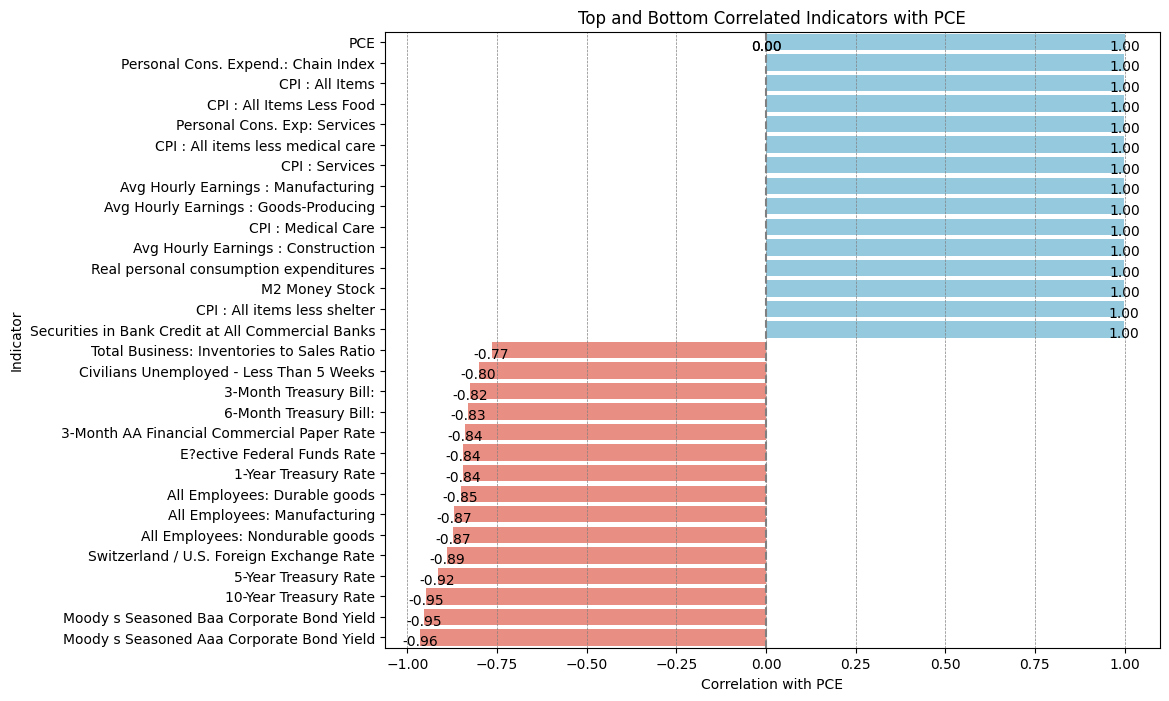

In [5]:
from utils.visualisation import plot_correlations

# Calculate the Spearman's rank correlation with the private consumption expenditure, handling NaNs with pairwise deletion.
correlation_matrix = joined_dataset.corr(method="spearman")

# target_correlations will have the Spearman's rank correlation coefficients
target_correlations = correlation_matrix["PCE"].sort_values(ascending=False)

plot_correlations(target_correlations, 15, 15)

<div style="color:#00BFFF">

---

##### Create function to call top_n absolute correlations with PCE


<div style="color:#FF7F50">

**Understanding Correlation Analysis**

</div>

In our data analysis process, understanding the relationship between different variables and our target variable, Personal Consumption Expenditures (PCE), is crucial. To achieve this, we employ a methodical approach to calculate correlations, allowing us to quantify the linear relationship between each variable in the dataset and the PCE.

Calculating sorted correlations serves several key purposes:

- **Identify Strong Relationships:** By sorting correlations, we prioritize variables that have a strong linear relationship with the PCE, either positively or negatively. This enables us to focus our analysis on variables that are most influential to our target variable.

- **Enhance Interpretability:** Sorting correlations by their absolute values, while retaining their original signs, allows us to easily interpret the direction and strength of each relationship. This dual perspective is essential for a nuanced understanding of how variables interact within our dataset.


In [6]:
def calculate_sorted_correlations(dataset, target_column):
    """
    Calculate correlations of all columns in the dataset with a target column,
    sort them by the absolute value of the correlation, and return as a Series while retaining
    the original positive or negative signs.
    """
    # Ensure the index is in datetime format
    dataset.index = pd.to_datetime(dataset.index)

    # Calculate Pearson correlation with target column
    correlation_with_target = dataset.corrwith(
        dataset[target_column], method="spearman"
    ) 

    # Sort the correlations by absolute value, but retain the original values
    sorted_correlations = correlation_with_target.reindex(
        correlation_with_target.abs().sort_values(ascending=False).index
    )

    # Return the sorted correlations as a Series
    return sorted_correlations


# Initial calculation
top_correlations = calculate_sorted_correlations(joined_dataset, "PCE")

<div style="color:#00BFFF">

---

##### Explore Relationship between PCE and economic indicators


We employ the `top_indicators_against_pce_line_graph` function from our `utils.visualisation` module to illustrate the relationship between Personal Consumption Expenditures (PCE) and its top correlated economic indicators. This visualization helps us understand how these indicators interact with PCE over time.

<div style="color:#FF7F50">

**Key Steps:**

</div>

1. **Identify Strong Correlations:** Calculates correlations between PCE and dataset variables to pinpoint the most influential indicators.
2. **Visual Comparison:** Generates line graphs for each top indicator against PCE, offering a clear visual of their movements over a selected period.
3. **Enhanced Readability:** Applies labeling and styling to ensure the graphs are informative and accessible.

This function streamlines complex economic analyses, making it easier to spot trends and patterns that influence PCE. It's a crucial tool for identifying factors driving consumption expenditures, valuable for forecasting and policy analysis.


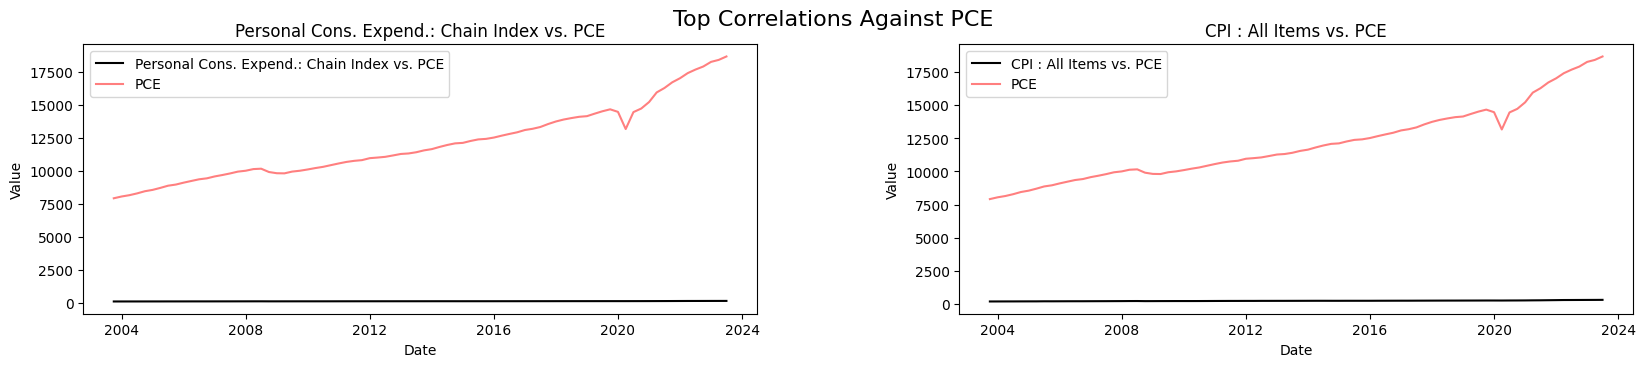

In [7]:
from utils.visualisation import top_indicators_against_pce_line_graph

top_indicators_against_pce_line_graph(joined_dataset, top_correlations,top_n=2) # top_n is the number of top indicators to plot

The line graphs of the top indicators against Personal Consumption Expenditures (PCE) reveals notable differences in scale among the variables, presenting a challenge for direct comparison. This variation in magnitude underscores the need for further preprocessing to bring these indicators onto a common scale. Addressing this issue is crucial for several reasons:

1. **Enhanced Comparability:** Normalizing the data or applying scale transformations can significantly improve the comparability of indicators, allowing for a more accurate assessment of their relative movements and impacts on PCE.

2. **Clearer Insights:** Adjusting for scale differences facilitates clearer visual interpretations, making it easier to identify patterns, trends, and potential anomalies that may warrant closer investigation.

3. **Informed Decision-Making:** With indicators on a unified scale, subsequent analyses, including correlation assessments and predictive modeling, will be based on a more balanced and representative dataset, leading to more reliable conclusions and informed economic forecasting or policy development.


<div style="color:#00BFFF">

---

##### Log and differencing Transformation on joined dataset for comparability


<div style="color:#FF7F50">

**Rationale:**

</div>

Lod transformation is used to stabilize the variance in data that exhibits exponential growth or large fluctuations. This is especially crucial for datasets like FRED's, where certain indicators can show significant variability over time. Given the information from the FRED database and their suggested transformation types, it seems reasonable to align with their expertise and apply these transformations to the dataset. This approach will save time and ensure that the data is treated consistently with established economic analysis practices.

<div style="color:#FF7F50">
**Transformation Types (as per FRED):**
</div>

1. **No Transformation (1)**: The data is used as is, without any modification.
2. **First Difference (∆x_t) (2)**: The change from one period to the next, useful for highlighting trends.
3. **Second Difference (∆^2x_t) (3)**: The change in the first difference, often used to capture acceleration or deceleration in a series.
4. **Natural Log (log(x_t)) (4)**: Useful for stabilizing variance and making exponential growth trends linear.
5. **First Difference of Log (∆ log(x_t)) (5)**: Commonly used to convert data into a stationary series, representing percentage change.
6. **Second Difference of Log (∆^2 log(x_t)) (6)**: The change in the first difference of the log, similar to the second difference but for logged data.
7. **Percentage Change from Prior Period (∆(x*t/x_t*−_1 − 1.0)) (7)**: This calculates the percentage change from the previous period, emphasizing relative changes.

<div style="color:#FF7F50">

**Approach:**

</div>

- **Apply Transformations:** Apply FRED Transformations and use the transformation codes provided in the `fred_indicator_mappings` dataset to transform the corresponding series in `joined_dataset`.
- This approach should streamline our analysis process and align with the methodology with FRED's established practices.
- Additionally, it ensures that the data is treated in a manner that is suitable for economic analysis.
- **FRED Logarithmic Key Mapping:** We will map the transformation codes in the FREDmd_defn dataset to our dataset's indicators and then perform the necessary transformations.


In [8]:
#  transformation function to handle the time column and a special case for PCE
def modified_log_transform(
    column, time_column, transformation_code=4, column_name=None
):
    """
    Applies the specified transformation to a Pandas Series, considering the time column and special cases.
    """
    time_column = time_column.astype(str)
    # Special instruction for the PCE column
    if column_name in ("PCE"):
        transformation_code = 5  # 6 # according to FREDs guidelines

    # Check if the data is quarterly based on the time column
    mult = 4 if any(time_column.str.endswith(("Q1", "Q2", "Q3", "Q4"))) else 1

    if transformation_code == 1:
        # No transformation -> Mathematical Equation: x(t)
        # It leaves the data in its original form, without any alteration.
        print(f"No transformation applied to column '{column_name}'")
        return column

    elif transformation_code == 2:
        # First Difference -> Mathematical Equation: x(t) - x(t-1)
        # It measures the absolute change from one period to the next, helping to detrend the data.
        print(f"Applying first difference to column '{column_name}'")
        return column.diff()

    elif transformation_code == 3:
        # Second Difference -> Mathematical Equation: (x(t) - x(t-1)) - (x(t-1) - x(t-2))
        # It measures the change in the first difference, capturing the acceleration or deceleration in the data's movement.
        print(f"Applying second difference to column '{column_name}'")
        return column.diff().diff()

    elif transformation_code == 4:
        # Log Transformation -> Mathematical Equation: ln(x(t))
        # It stabilizes the variance across the data series and can help make a skewed distribution more normal.
        print(f"Applying log transformation to column '{column_name}'")
        return np.log(column)

    elif transformation_code == 5:
        # Log First Difference -> Mathematical Equation: 100 * (ln(x(t)) - ln(x(t-1)))
        # It measures the growth rate from one period to the next and multiplies by 100 for percentage change.
        # The 'mult' variable allows for scaling the growth rate if necessary.
        print(f"Applying log first difference to column '{column_name}'")
        return np.log(column).diff() * 100 * mult

    elif transformation_code == 6:
        # Log Second Difference -> Mathematical Equation: 100 * ((ln(x(t)) - ln(x(t-1))) - (ln(x(t-1)) - ln(x(t-2))))
        # It measures the change in the growth rate (change in log first difference), capturing the momentum of change.
        # The 'mult' variable allows for scaling the change in growth rate if necessary.
        print(f"Applying log second difference to column '{column_name}'")
        return np.log(column).diff().diff() * 100 * mult

    elif transformation_code == 7:
        # Exact Percent Change -> Mathematical Equation: 100 * ((x(t)/x(t-1))^mult - 1)
        # It measures the percentage change from one period to the next, with an option to compound the change using 'mult'.
        print(f"Applying exact percent change to column '{column_name}'")
        return ((column / column.shift(1)) ** mult - 1.0) * 100

    else:
        print(f"Invalid transformation code for column '{column_name}'")
        return column
        raise ValueError("Invalid transformation code")


# Create a mapping of columns to transformation codes
transformation_mapping = defn.set_index("description")["tcode"].to_dict()

# Extracting the time column
time_column = joined_dataset.index

# Applying the transformations to the dataframe
transformed_dataset = joined_dataset.copy()

for column in transformed_dataset.columns:
    # Check if the column is in the mapping, else apply special instruction for PCE
    tcode = transformation_mapping.get(column, None)
    transformed_dataset[column] = modified_log_transform(
        transformed_dataset[column], time_column, tcode, column
    )

# Drop the first 5 rows containing NaN values resulting from the transformation
transformed_dataset = transformed_dataset.iloc[5:]

# Displaying the first few rows of the transformed dataset
joined_dataset = transformed_dataset

Applying log first difference to column 'PCE'
Applying log first difference to column 'Real Personal Income'
Applying log first difference to column 'Real personal income ex transfer receipts'
Applying log first difference to column 'Real personal consumption expenditures'
Applying log first difference to column 'Real Manu. and Trade Industries Sales'
Applying log first difference to column 'Retail and Food Services Sales'
Applying log first difference to column 'IP Index'
Applying log first difference to column 'IP: Final Products and Nonindustrial Supplies'
Applying log first difference to column 'IP: Final Products (Market Group)'
Applying log first difference to column 'IP: Consumer Goods'
Applying log first difference to column 'IP: Durable Consumer Goods'
Applying log first difference to column 'IP: Nondurable Consumer Goods'
Applying log first difference to column 'IP: Business Equipment'
Applying log first difference to column 'IP: Materials'
Applying log first difference to co

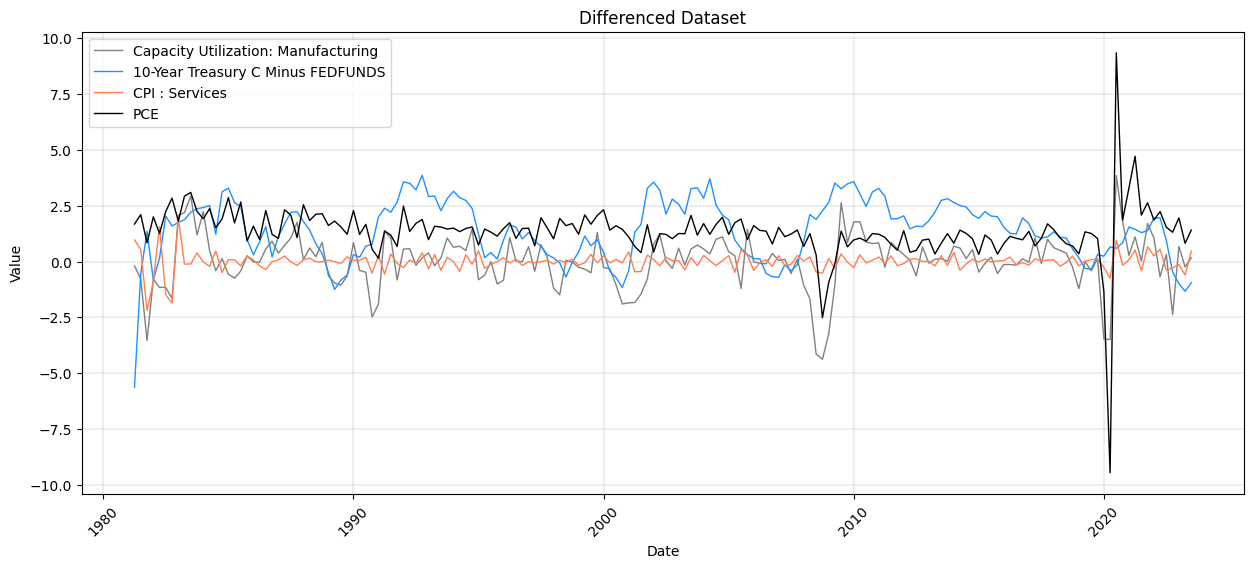

In [9]:
from utils.visualisation import plot_dataset

#plot after each transformation
plot_dataset(joined_dataset, "Differenced Dataset")

In [10]:
# import missingno as msno
# %matplotlib inline
# msno.matrix(joined_dataset[top_correlations.index])

<div style="color:#00BFFF">

---

##### Explore the relationships between indicators


Next in we need to understand the relationships between different indicators. This insight not only aids in identifying patterns and trends but also in detecting potential multicollinearity among variables, which can significantly impact the results of econometric models.

To navigate these complexities, we employ the `plot_clustermap_of_correlations` function.

<div style="color:#FF7F50">

**Purpose and Importance:**

</div>

The function generates a hierarchical clustering heatmap (clustermap) of the correlation matrix derived from our dataset. This visualization technique is instrumental for several reasons:

- **Comprehensive Overview:** It offers a bird's-eye view of how indicators relate to each other, showcasing both the strength and direction of correlations across the entire dataset.
- **Detection of Multicollinearity:** By visualizing clusters of highly correlated variables, we can easily spot groups of indicators that might exhibit multicollinearity.

- **Threshold Application:** The option to apply a cluster threshold helps in simplifying the dendrogram, making it easier to identify and interpret meaningful clusters while excluding less significant associations.

<div style="color:#FF7F50">

**Strategic Application in Economic Modeling:**

</div>

Employing this function is a strategic choice in our modeling process. It enables us to preemptively address potential issues with multicollinearity and to refine our selection of variables for inclusion in econometric models.


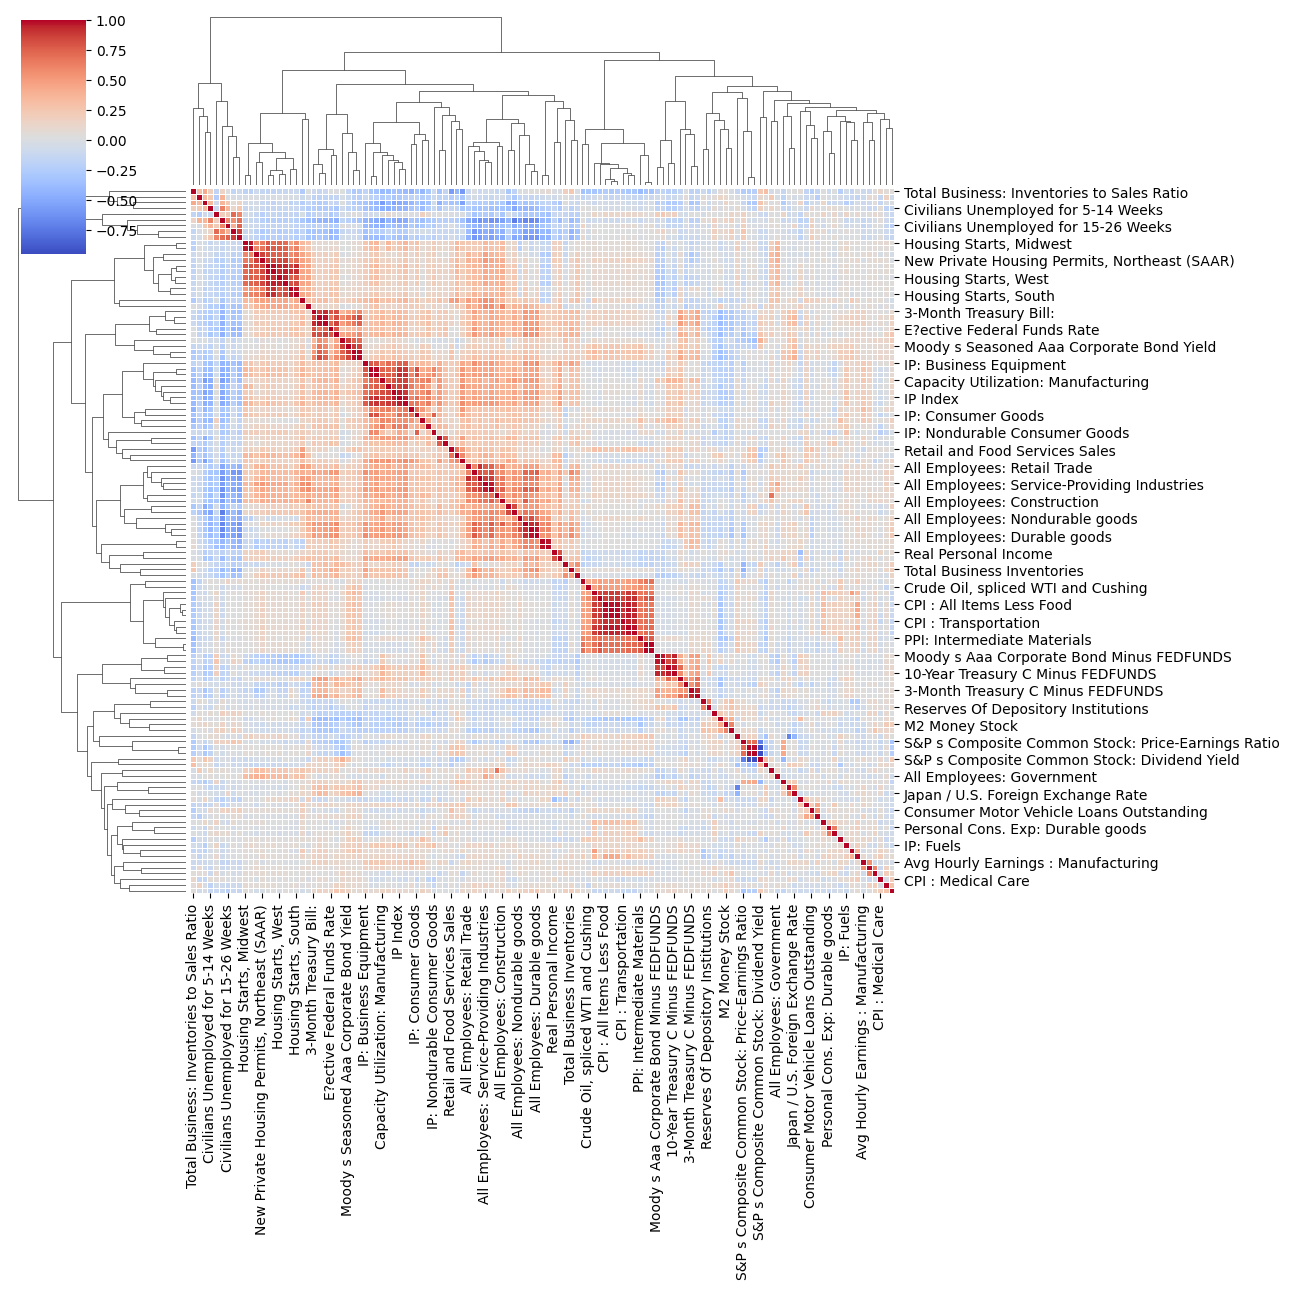

In [11]:
def plot_clustermap_of_correlations(dataset, method="pearson", cluster_threshold=None):
    """
    Plots a clustermap (hierarchical clustering heatmap) of the correlation matrix of the dataset.

    :param dataset: Pandas DataFrame containing the data.
    :param method: String, method of correlation (default 'pearson'). Other methods include 'spearman' and 'kendall'.
    :param cluster_threshold: Float, the threshold to apply a cutoff in the dendrogram. Clusters below this threshold are not shown.
    """
    # Calculate the correlation matrix
    correlation_matrix = dataset.corr(method=method)

    # Create a clustermap
    clustergrid = sns.clustermap(
        correlation_matrix,
        method="average",
        cmap="coolwarm",
        linewidths=0.5,
        figsize=(13, 13),
    )

    # Apply a threshold to the clustering to clean up the dendrogram, if specified
    if cluster_threshold is not None:
        sns.clustermap(
            correlation_matrix,
            method="average",
            cmap="coolwarm",
            linewidths=0.5,
            figsize=(13, 13),
            col_cluster=False,
            row_cluster=False,
            color_threshold=cluster_threshold,
        )

    plt.setp(clustergrid.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    plt.setp(clustergrid.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
    plt.show()


# Example usage:
plot_clustermap_of_correlations(joined_dataset[top_correlations.index], method="spearman")

<div style="color:#00BFFF">

---

##### Interpretation of EDA Findings


<div style="color:#FF7F50">

**The following sections detail the insights gathered from our EDA.**

</div>

<div style="color:#FF7F50">

**High Correlation Amongst Variables**

</div>

Our initial correlation analysis revealed extremely high correlations among many economic variables. This phenomenon is not uncommon in economic datasets where multiple indicators may reflect similar underlying economic factors. For example:

- **Labour Market Indicators**: Variables related to employment and wages, such as 'Avg Hourly Earnings' across different sectors, show strong correlations as they all capture aspects of the labour market.
- **Consumer Price Index (CPI) Data**: The 'CPI All Items' index and its subcomponents, such as 'CPI Medical Care' and 'CPI Services', tend to move in tandem since they are facets of the overall inflation measure.

These highly correlated variables suggest redundancy, implying that some indicators may provide overlapping information. Such redundancy can inflate the apparent importance of these factors in subsequent analyses and may need consolidation or exclusion to prevent multicollinearity issues in our modeling efforts.

<div style="color:#FF7F50">

**Comparability of Measurements**

</div>

Upon reviewing temporal line graphs, it became evident that the measurements across variables are not directly comparable. The dataset comprises a variety of units, including currencies, ratios, indices, rates, percentages, and quantities scaled in millions or billions of dollars or thousands of persons. This diversity in units poses a significant challenge:

- **Unit Diversity**: Without standardization, direct comparisons or aggregations of these variables may lead to incorrect conclusions or ineffective models.
- **Scaling and Transformation**: It is crucial to bring these variables to a common scale or transform them appropriately to facilitate meaningful comparison and analysis.

<div style="color:#FF7F50">

**Multicollinearity Investigation**

</div>

The circular heatmap, a tool to visualize complex relationships, highlighted an extremely high level of multicollinearity among variables. This insight is particularly concerning for several reasons:

- **Model Stability and Interpretation**: High multicollinearity can destabilize our models and make the interpretation of individual variable effects problematic.
- **Variable Selection**: The presence of multicollinearity necessitates a careful approach to variable selection, ensuring that our models are both robust and interpretable.


<div style="color:#00BFFF">

---

##### Actionable Steps


To address these findings and prepare for model building and proxy selection, we propose the following steps:

1. **Standardization and Transformation**: Apply standardization or normalization procedures to ensure that variables are on a comparable scale, especially before PCA or any regression analysis.The FRED Database provide detailed guidelines in their FREDmd_APPENDIx, where every indicator has a transformation type and can be transformed according to that appendix to be more comparable accross the dataset.

2. **Proxy Selection**: Adopt a strategic approach to select proxies that not only exhibit strong correlations with our target, PCE, but also add unique information without causing multicollinearity.

3. **Variable Reduction**: Implement dimensionality reduction techniques, such as Principal Component Analysis (PCA), to consolidate the information from highly correlated variables into fewer representative components.

By addressing these concerns systematically, we aim to refine our dataset for subsequent modeling phases, ensuring the reliability and validity of our findings as we progress in our analysis.


<div style="color:#00BFFF">

---

##### Drop granular indices and keep Total Indices


<div style="color:#FF7F50">

**Dropping Granular Indicators for Enhanced Predictive Power**

</div>

We've made a strategic decision to drop granular indicators in favor of their respective totals to streamline our predictive modeling process, enhance model performance, and maintain consistency and interpretability. Here's why:

**1. Enhanced Predictive Power**

Granular indicators often represent detailed sub-components or sub-categories of a broader metric. While these granular details may provide insights into specific aspects, they can introduce noise and redundancy into our predictive models.

**2. Reduction of Dimensionality**

Including both granular indicators and their totals can result in high dimensionality in our dataset. High dimensionality can lead to increased computational complexity, longer training times, and a higher risk of overfitting.

**3. Consistency and Interpretability**

Total indicators offer consistency in measurement units and interpretation. Granular indicators may have varying units or scales, making it challenging to compare and analyze them effectively.

**4. Focus on Key Drivers**

In many cases, it's the total figures that directly impact the outcomes we want to predict.

</div>


In [12]:
# granular_indices_to_drop = [
#     # Granular Housing data keep-> 'Housing Starts: Total New Privately Owned', 'New Private Housing Permits (SAAR)'
# "Help-Wanted Index for United States",
# "Avg Weekly Hours : Goods-Producing",
# "Avg Weekly Hours : Manufacturing",
# # "Housing Starts: Total New Privately Owned",
# "Housing Starts, Northeast",
# "Housing Starts, Midwest",
# "Housing Starts, South",
# "Housing Starts, West",
# # "New Private Housing Permits (SAAR)",
# "New Private Housing Permits, Northeast (SAAR)",
# "New Private Housing Permits, Midwest (SAAR)",
# "New Private Housing Permits, South (SAAR)",
# "New Private Housing Permits, West (SAAR)",
# "S&P s Common Stock Price Index: Composite",
# "S&P s Common Stock Price Index: Industrials",
# "Moody s Aaa Corporate Bond Minus FEDFUNDS",
# "Moody s Baa Corporate Bond Minus FEDFUNDS",

# #Features with relatively high standard deviation values:
# "Civilians Unemployed - Less Than 5 Weeks",
# "Civilians Unemployed for 5-14 Weeks",
# "Civilians Unemployed - 15 Weeks & Over",
# "Civilians Unemployed for 15-26 Weeks",
# "Civilians Unemployed for 27 Weeks and Over",
# "Initial Claims",
# "New Orders for Nondefense Capital Goods",
# # "M1 Money Stock",
# "Total Reserves of Depository Institutions",
# "Reserves Of Depository Institutions",
# "S&P s Composite Common Stock: Price-Earnings Ratio",
# "PPI: Crude Materials",
# "Crude Oil, spliced WTI and Cushing",
# "PPI: Metals and metal products:"
# ]
# joined_dataset.drop(columns=granular_indices_to_drop, inplace=True)

# # delete rows in defn where the value is in columns_to_drop
# # defn = defn[~defn["description"].isin(granular_indices_to_drop)]

In [13]:
## interpolate the missing values
joined_dataset = joined_dataset.interpolate(method="linear")

#backwards fill any missing data
joined_dataset = joined_dataset.fillna(method="bfill")

#forward fill any missing data
joined_dataset = joined_dataset.fillna(method="ffill")

joined_dataset.to_csv("joinedc_dataset_transformed.csv")

<div style="color:#00BFFF">

---

##### Results after transformations


In [14]:
# top_correlations = calculate_sorted_correlations(joined_dataset, "PCE")

# top_indicators_against_pce_line_graph(joined_dataset, top_correlations)

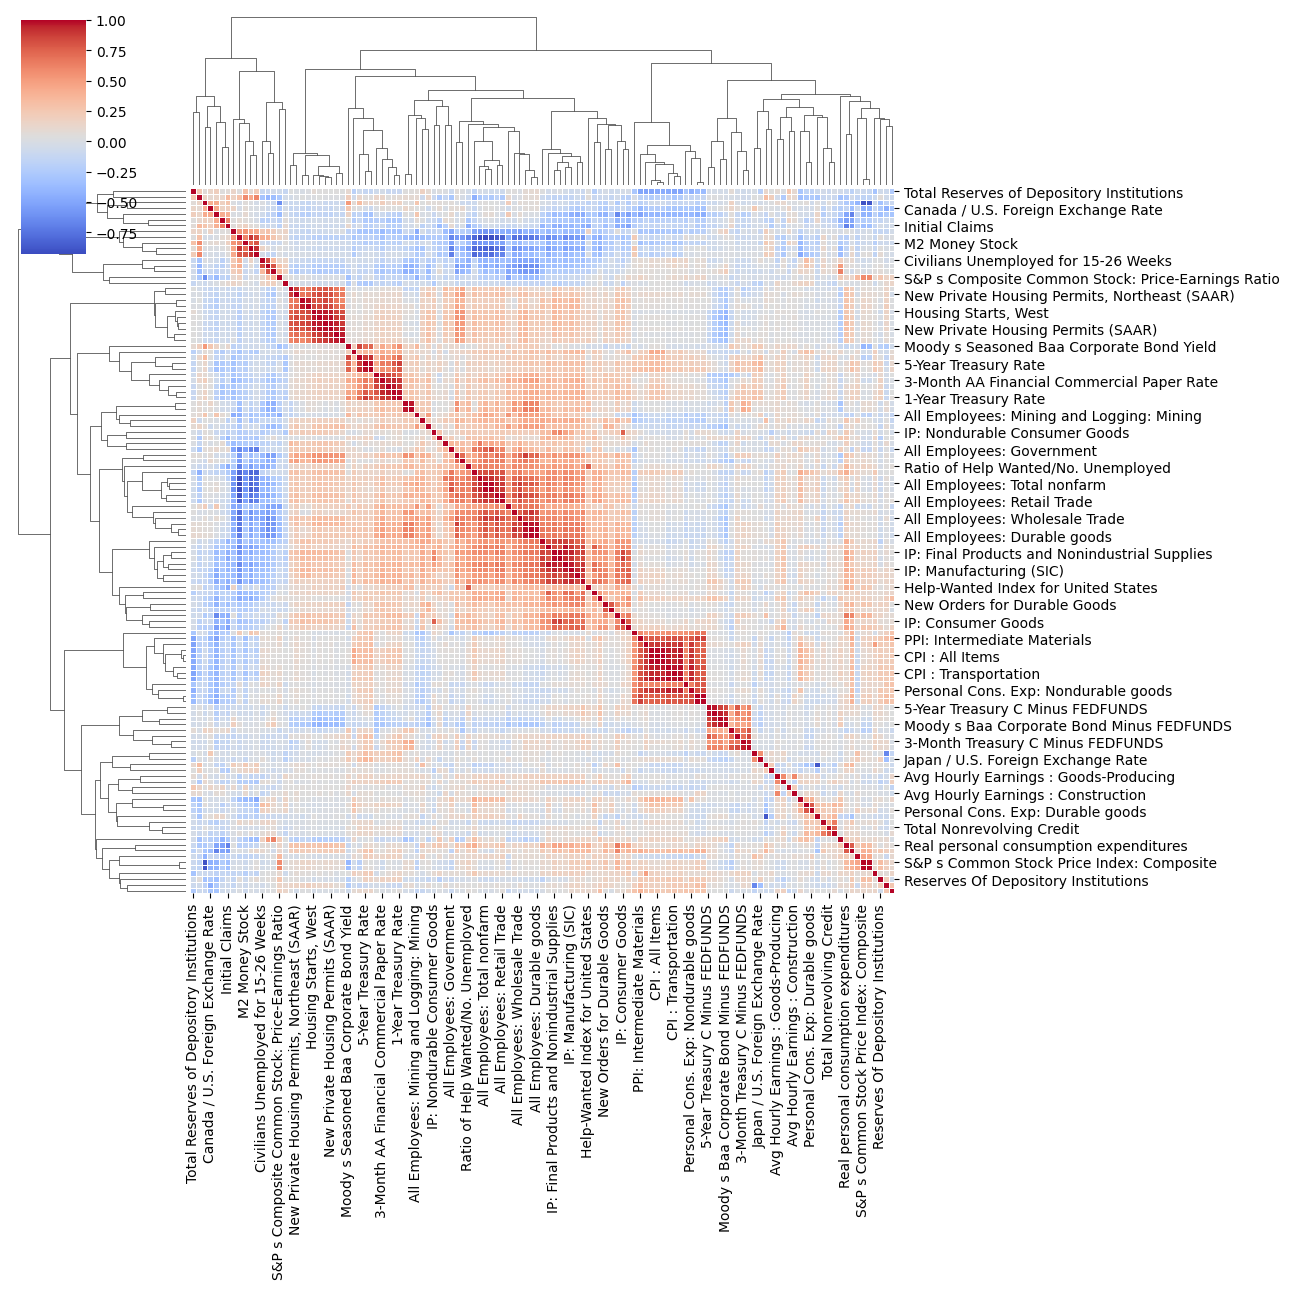

In [15]:
plot_clustermap_of_correlations(joined_dataset)

In [16]:
joined_dataset.head()

,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
1981-04-01,1.672315,0.663325,0.865790,0.363536,-0.918143,-0.472497,0.670984,0.739420,

<div style="color:#FF7F50">

**Understanding Correlation Patterns with Correlation Circle Heatmap**

</div>

The `plot_correlation_circle_heatmap` function is designed to provide insights into the correlation patterns among our top indicators after our analysis.

We employ this function to visualize and assess the interrelationships between the top N indicators, where N is a user-defined parameter. By examining the correlation circle heatmap, we gain valuable insights into how these indicators interact with each other. This visualization is instrumental in identifying any strong correlations or collinearities among the chosen indicators.

</div>


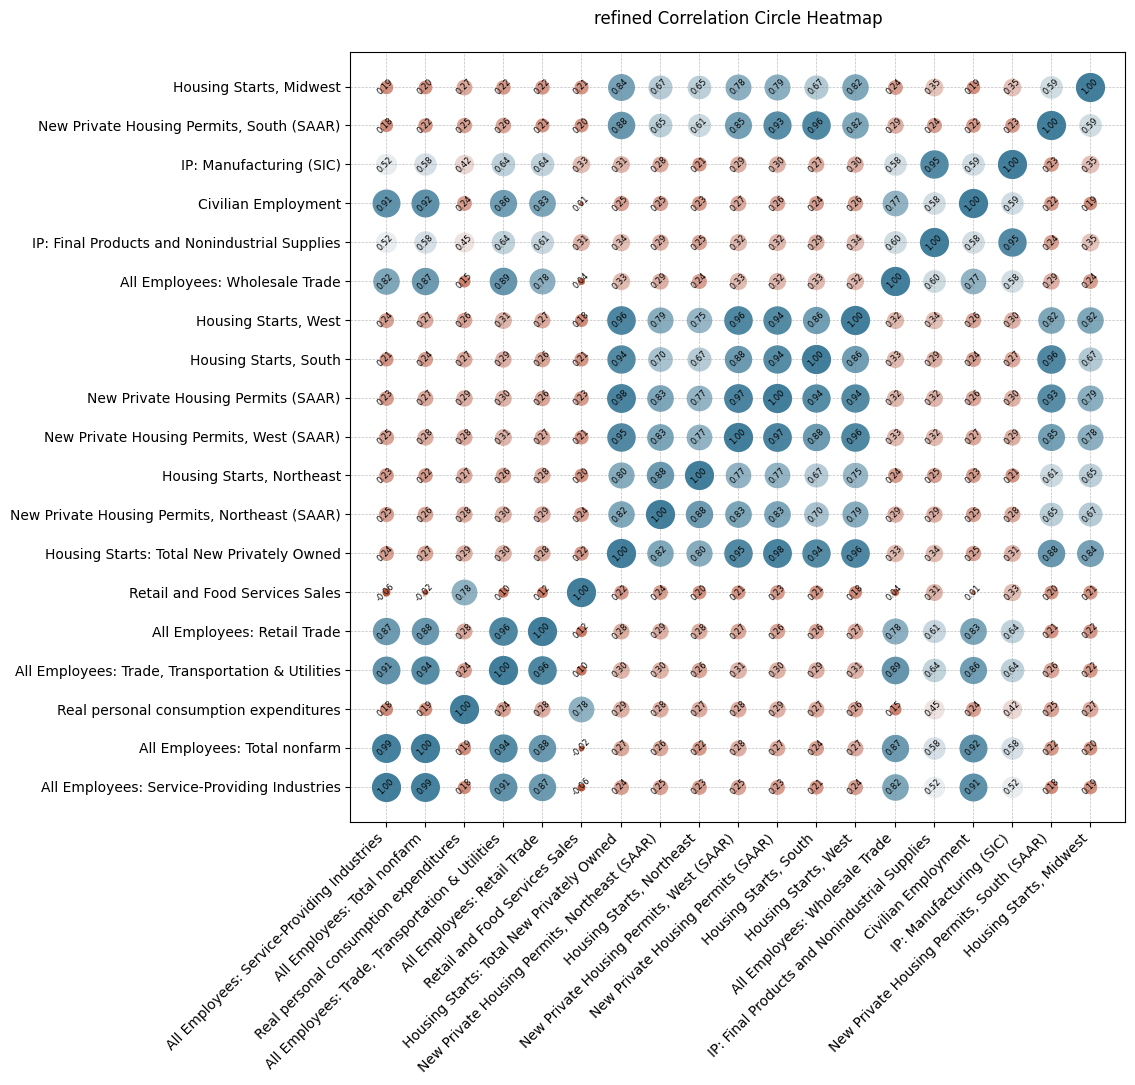

In [17]:
from utils.visualisation import plot_correlation_circle_heatmap

# target_correlations will have the Spearman's rank correlation coefficients
target_correlations = joined_dataset["PCE"].sort_values(ascending=False)


top_correlations = calculate_sorted_correlations(joined_dataset, "PCE")

plot_correlation_circle_heatmap(
    joined_dataset,top_correlations,
    top_n=20,
    fig_title="refined Correlation Circle Heatmap",
)

In [18]:
joined_dataset.to_csv("refined_dataset.csv")

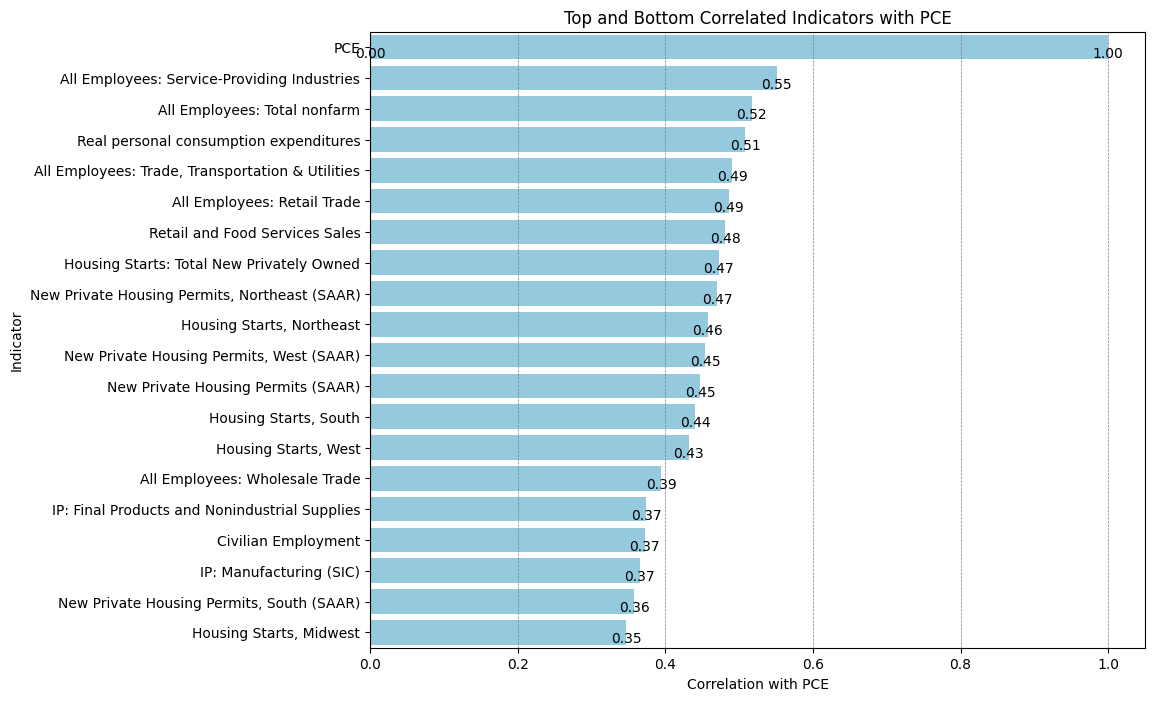

In [19]:
top_correlations = calculate_sorted_correlations(joined_dataset, "PCE")

# calculate_sorted_correlations(joined_dataset, 'PCE')
plot_correlations(top_correlations, 20, 0)

As evident from our analysis, we have successfully mitigated multicollinearity, resulting in a well-defined set of indicators that exhibit meaningful correlations with PCE. To further explore the predictive power of these indicators, our next step involves conducting linear regression analysis to assess their capacity to explain the variance observed in PCE


<div style="color:#00BFFF">

---

##### Linear Regression Analysis to Determine Variable Influence on PCE


This section of the notebook conducts a linear regression analysis to explore how different variables in our dataset influence the Private Consumption Expenditure (PCE). The primary goal is to determine the strength of the linear relationship each variable has with PCE, quantified using the $R^2$ (coefficient of determination) metric.Variables with higher $R^2$ values are of particular interest as they may be key drivers of PCE variations.By understanding these relationships, we can better comprehend the dynamics influencing Private Consumption Expenditure, an essential component of economic analysis.

<div style="color:#FF7F50">

**Steps in the Analysis:**

</div>

1. **Data Preparation:**

   - We exclude 'PCE' from the list of independent variables as it is our dependent variable.
   - The dataset is cleaned to remove any rows with NaN or infinite values to ensure the validity of our regression analysis.

2. **Linear Regression:**

   - For each independent variable, we perform a simple linear regression against 'PCE'.
   - Only variables with a sufficient number of observations (set by `min_threshold`) are considered to ensure robust regression results.

3. **Calculation of $R^2$ Values:**
   - After fitting the model, we predict 'PCE' using each independent variable and compute the $R^2$ value.
   - The $R^2$ value indicates how much of the variance in 'PCE' is explained by the variable. A higher $R^2$ suggests a stronger explanatory power.


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the independent variables (excluding 'PCE')
independent_vars = joined_dataset.drop(columns=["PCE"]).columns

# Prepare the dependent variable 'PCE'
dependent_var = joined_dataset["PCE"]

# Setting a minimum threshold for the number of observations required for regression
min_threshold = 30

# Dictionary to store R^2 values for each variable
r2_values = {}

# Perform linear regression for each independent variable
for var in independent_vars:
    # Drop rows where either the independent or dependent variable is NaN or infinite
    combined_data = joined_dataset[[var, "PCE"]].replace(
        [np.inf, -np.inf], np.nan
    )  # .dropna()

    # replace np.nan with 0
    combined_data = combined_data.dropna()

    if len(combined_data) >= min_threshold:
        # Prepare the data for regression
        X = combined_data[var].values.reshape(-1, 1)
        y = combined_data["PCE"].values

        # Create and fit the model
        model = LinearRegression()
        model.fit(X, y)

        # Predict and calculate R^2
        predictions = model.predict(X)
        r2_values[var] = r2_score(y, predictions)

# Sorting the R^2 values
r2_values_sorted = dict(
    sorted(r2_values.items(), key=lambda item: item[1], reverse=True)
)

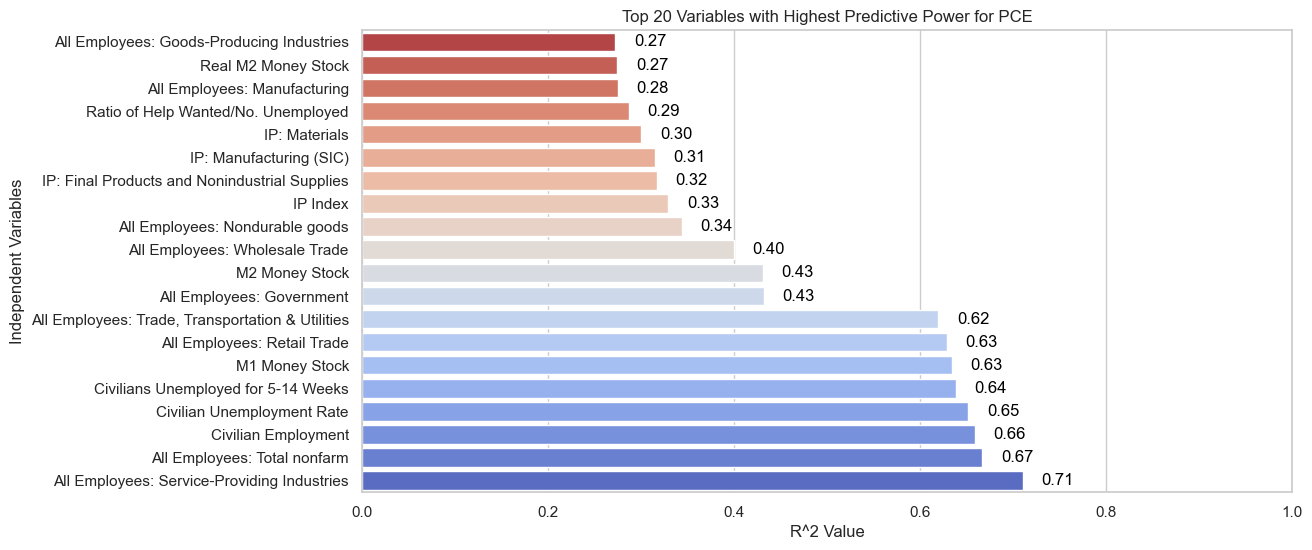

In [21]:
# Extract the top N variables and their corresponding R^2 values
top_n = 20
top_vars = list(r2_values_sorted.keys())[:top_n]
top_r2_values = list(r2_values_sorted.values())[:top_n]

# Create a bar plot to visualize the R^2 values
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=top_r2_values, y=top_vars, palette="coolwarm")

# Customize the plot appearance
ax.set(xlim=(0, 1), xlabel="R^2 Value", ylabel="Independent Variables")
plt.title(f"Top {top_n} Variables with Highest Predictive Power for PCE")
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest value at the top

# Display the R^2 values on the bars
for i, v in enumerate(top_r2_values):
    ax.text(v + 0.02, i, f"{v:.2f}", color="black", va="center")

# Show the plot
plt.show()

- The \( R^2 \) values are sorted and the top results are displayed.
- This ranking helps us identify which variables have the most significant linear relationship with 'PCE'.


In [22]:
indicators = top_correlations.drop("PCE")

# Assuming 'r2_values_sorted' and 'top_bottom_cor' are dictionaries or pandas Series
r2_values = pd.Series(r2_values_sorted)
cor_values = indicators  # .drop('PCE')  # Exclude PCE as it's a self-correlation

# Merge the two Series into a DataFrame and add groups
comparison_df = pd.DataFrame({"R_squared": r2_values, "Correlation": cor_values})

<div style="color:#00BFFF">

---

##### Proxy Evaluation and Variable Selection for Model fit


For constructing a Vector Autoregression (VAR) model, choosing the right number of variables (proxies in this case) is crucial for the model's performance and interpretability. Using too many variables can lead to overfitting and computational complexity, while too few may miss out on important information.

Suggested Approach:
Set Thresholds for Correlation and R-squared:
A correlation threshold (e.g., |Correlation| > 0.3) helps ensure that only variables significantly related to consumer spending (PCE) are included.
An R-squared threshold (e.g., R-squared > 0.2) ensures the variable has decent predictive power.


In [23]:
# Set thresholds
corr_threshold = 0.3
r_squared_threshold = 0.25

# Filter based on the thresholds
filtered_proxies = comparison_df[
    (comparison_df["Correlation"].abs() > corr_threshold) |
    (comparison_df["R_squared"] > r_squared_threshold)
]

# Now, 'filtered_proxies' contains variables meeting both criteria
selected_variables = filtered_proxies.index.tolist()

# Convert comparison_df.index to a list to ensure compatibility
columns_to_keep = selected_variables + ["PCE"]

# Filter the columns in final_proxy_dataset_for_validation
final_proxy_dataset = joined_dataset[columns_to_keep]

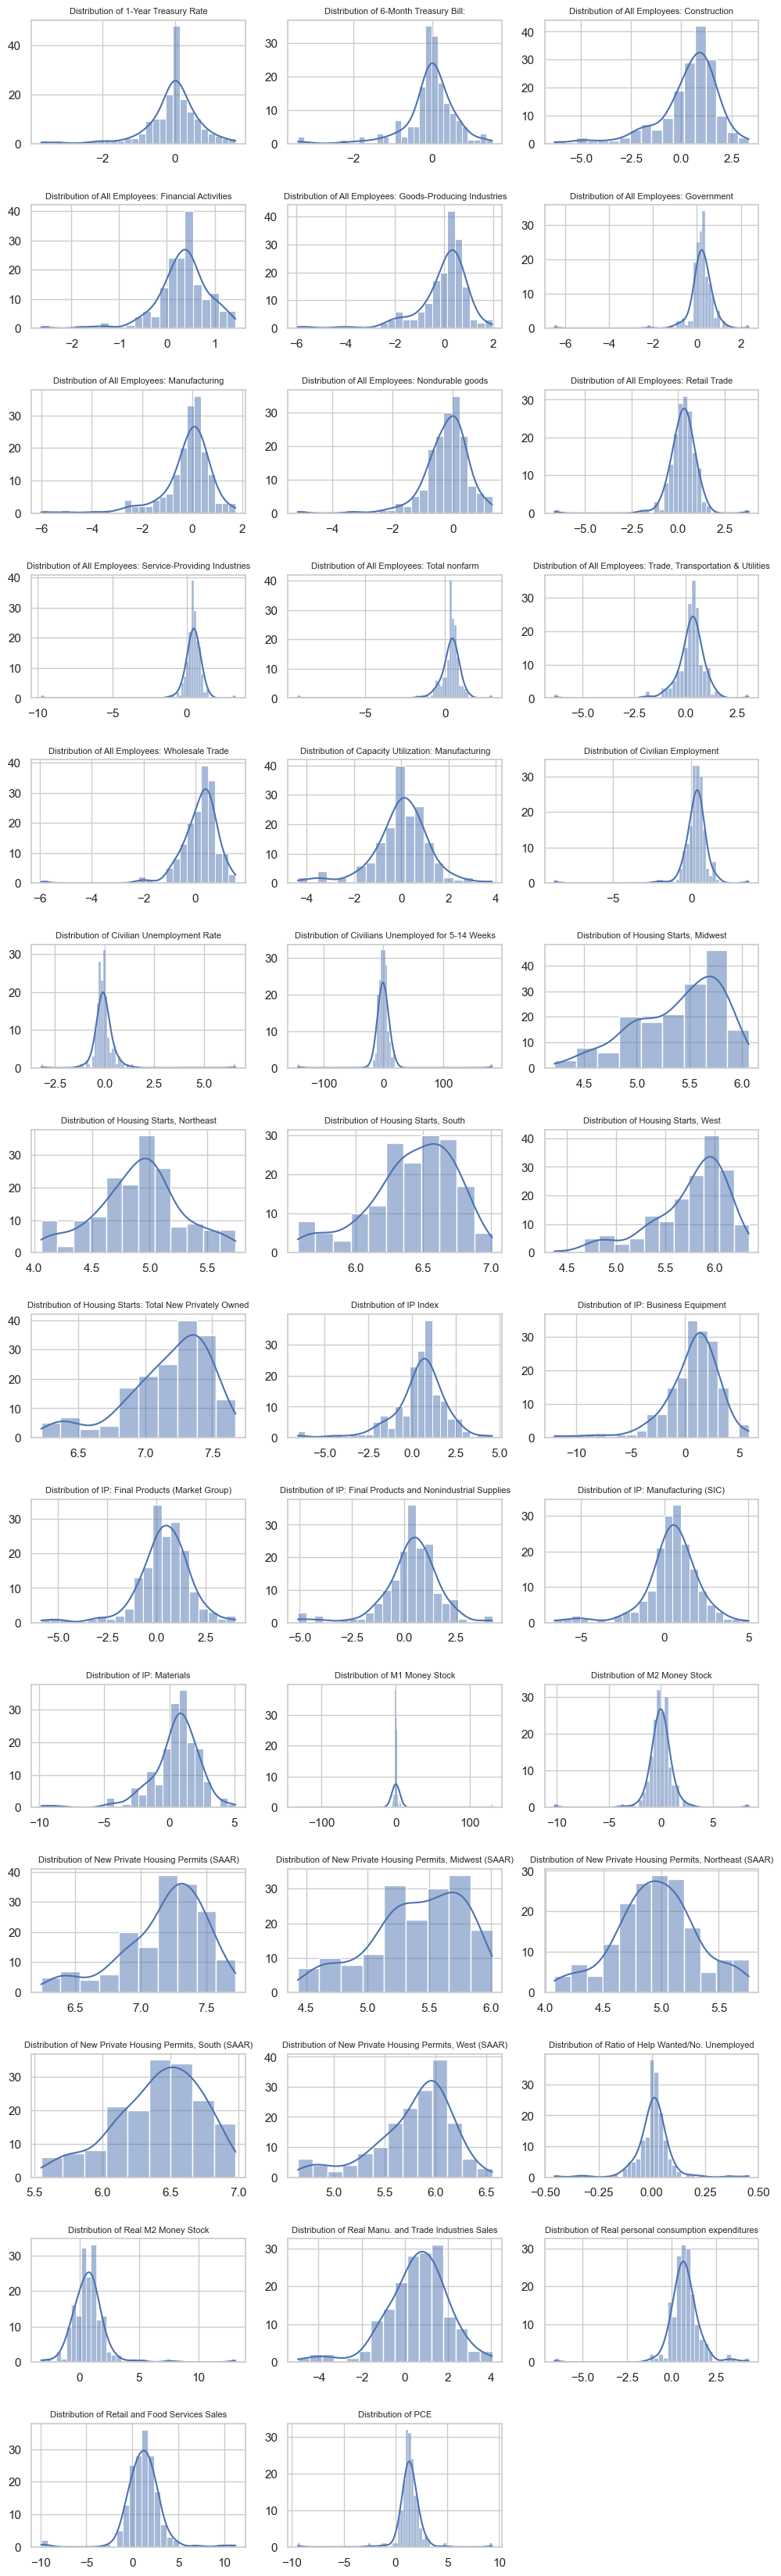

In [24]:
# Create a pairplot for the final_proxy_dataset
sns.set(style="whitegrid")
columns = final_proxy_dataset.columns
num_columns = len(columns)

# Set the number of columns per row in the subplot grid
columns_per_row = 3
rows = (num_columns + columns_per_row - 1) // columns_per_row

# Create a figure and axes for the subplots
fig, axes = plt.subplots(rows, columns_per_row, figsize=(12, 3 * rows))
plt.subplots_adjust(hspace=0.5)

# Iterate through the columns and create histograms
for i, col in enumerate(columns):
    row_idx = i // columns_per_row
    col_idx = i % columns_per_row
    ax = axes[row_idx, col_idx]

    # Create a histogram for the current column
    sns.histplot(final_proxy_dataset[col], ax=ax, kde=True)
    ax.set_title(f"Distribution of {col}", fontsize=8)
    ax.set_xlabel("")
    ax.set_ylabel("")

# Remove empty subplots if any
for i in range(num_columns, rows * columns_per_row):
    fig.delaxes(axes.flatten()[i])

# Display the plot
plt.show()

<div style="color:#FF7F50">

**Seasonality Assessment**:

</div>

Function to Check for Seasonality: This function will calculate the autocorrelation function (ACF) values for specified lags and determine if any exceed a given threshold, indicating seasonality.
Function to Remove Seasonality: This function will apply seasonal decomposition to a time series and adjust it by removing the seasonal component, returning the adjusted series.

In [25]:
from statsmodels.tsa.stattools import acf

def check_seasonality(series, max_lag, threshold=0.3, seasonal_lags=[4, 8, 12, 16]):
    """
    Check if a time series exhibits seasonality.

    Parameters:
    - series: Time series data.
    - max_lag: Maximum lag to consider for the ACF.
    - threshold: Threshold for ACF values to consider significant.
    - seasonal_lags: Lags to check for seasonality.

    Returns:
    - Boolean indicating if any of the specified lags show significant autocorrelation.
    """
    acf_values = acf(series, nlags=max_lag, fft=True)
    return any(abs(acf_values[lag]) > threshold for lag in seasonal_lags)


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonally_adjust(series, model='additive', period=12):
    """
    Adjusts a time series for seasonality.

    Parameters:
    - series: Time series data.
    - model: Type of decomposition ('additive' or 'multiplicative').
    - period: Seasonal period to adjust for.

    Returns:
    - Adjusted time series with seasonality removed.
    """
    result = seasonal_decompose(series, model=model, period=period)
    adjusted_series = result.trend + result.resid  # For additive model
    # For multiplicative model, use: adjusted_series = result.trend * result.resid
    return adjusted_series.dropna()  # Drop NaN values that result from decomposition


In [27]:

# Check for seasonality
seasonality_presence = {col: check_seasonality(final_proxy_dataset[col], max_lag=40) for col in final_proxy_dataset.columns}
print("Indicators with seasonality:")
for key, value in seasonality_presence.items():
    if value:
        print(key)

# Adjust for seasonality where necessary
for indicator, has_seasonality in seasonality_presence.items():
    if has_seasonality:
        final_proxy_dataset[indicator] = seasonally_adjust(final_proxy_dataset[indicator])

# Recheck for seasonality
seasonality_presence_after_adjustment = {col: check_seasonality(final_proxy_dataset[col], max_lag=40) for col in final_proxy_dataset.columns}
print("\nIndicators with seasonality after adjustment:")
indicators_with_no_seasonality = True
for key, value in seasonality_presence_after_adjustment.items():
    if value:
        print(key)
        indicators_with_no_seasonality = False

if indicators_with_no_seasonality:
    print("No indicators have seasonality.")

Indicators with seasonality:
All Employees: Construction
All Employees: Financial Activities
Housing Starts, Midwest
Housing Starts, Northeast
Housing Starts, South
Housing Starts, West
Housing Starts: Total New Privately Owned
New Private Housing Permits (SAAR)
New Private Housing Permits, Midwest (SAAR)
New Private Housing Permits, Northeast (SAAR)
New Private Housing Permits, South (SAAR)
New Private Housing Permits, West (SAAR)

Indicators with seasonality after adjustment:
No indicators have seasonality.


<div style="color:#FF7F50">

**Stationarity Assessment**:

</div>

Using tests like the Augmented Dickey-Fuller ensures that our time series data is suitable for modelling and forecasting, as many statistical models require stationarity for valid results.


In [28]:
from statsmodels.tsa.stattools import adfuller


# Function to perform Augmented Dickey-Fuller test
def adf_test(series, name=""):
    result = adfuller(series.dropna(), autolag="AIC")  # Drop NA values for the test
    conclusion = "Stationary" if result[1] < 0.05 else "Non-stationary"
    return {
        "Name": name,
        "Test Statistic": result[0],
        "P-Value": result[1],
        "Conclusion": conclusion,
    }


# Selecting a subset of series for stationarity testing, including PCE
series_to_test = selected_variables
adf_results = [
    adf_test(final_proxy_dataset[series], name=series) for series in series_to_test
]

adf_results_df = pd.DataFrame(adf_results)
adf_results_df

# add correlation and R^2 with PCE to the adf_results_df
adf_results_df["Correlation"] = [
    final_proxy_dataset[series].corr(final_proxy_dataset["PCE"])
    for series in series_to_test
]
adf_results_df["R_squared"] = [r2_values_sorted[series] for series in series_to_test]

# # add VIF to the adf_results_df
# adf_results_df["VIF"] = [
#     vif_data[vif_data["feature"] == series].VIF.values[0] for series in series_to_test
# ]

# add its lead and lag analysis to the adf_results_df
pce_alternative_proxies = adf_results_df[
    [
        "Name",
        "Correlation",
        "R_squared",
        # "VIF",
        "Test Statistic",
        "P-Value",
        "Conclusion",
    ]
]
pce_alternative_proxies

,Name,Correlation,R_squared,Test Statistic,P-Value,Conclusion
0,1-Year Treasury Rate,0.142954,0.020436,-4.402605,2.936975e-04,Stationary
1,6-Month Treasury Bill:,0.141229,0.019946,-4.311365,4.245075e-04,Stationary
2,All Employees: Construction,0.483477,0.196907,-3.264303,1.655154e-02,Stationary
3,All Employees: Financial Activities,0.508725,0.258315,-3.761816,3.323063e-03,Stationary
4,All Employees: Goods-Producing Industries,0.521707,0.272178,-4.611305,1.231119e-04,Stationary
5,All Employees: Government,0.657109,0.431792,-8.405125,2.178050e-13,Stationary
6,All Employees: Manufacturing,0.524576,0.275180,-5.933283,2.352946e-07,Stationary
7,All Employees: Nondurable goods,0.586163,0.343587,-5.337777,4.570614e-06,Stationary
8,All Employees: Retail Trade,0.792999,0.628847,-3.943042,1.739953e-03,Stationary
9,All Employees: Service-Providing Industries,0.842804,0.710318,-7.817825,6.795139e-12,Stationary


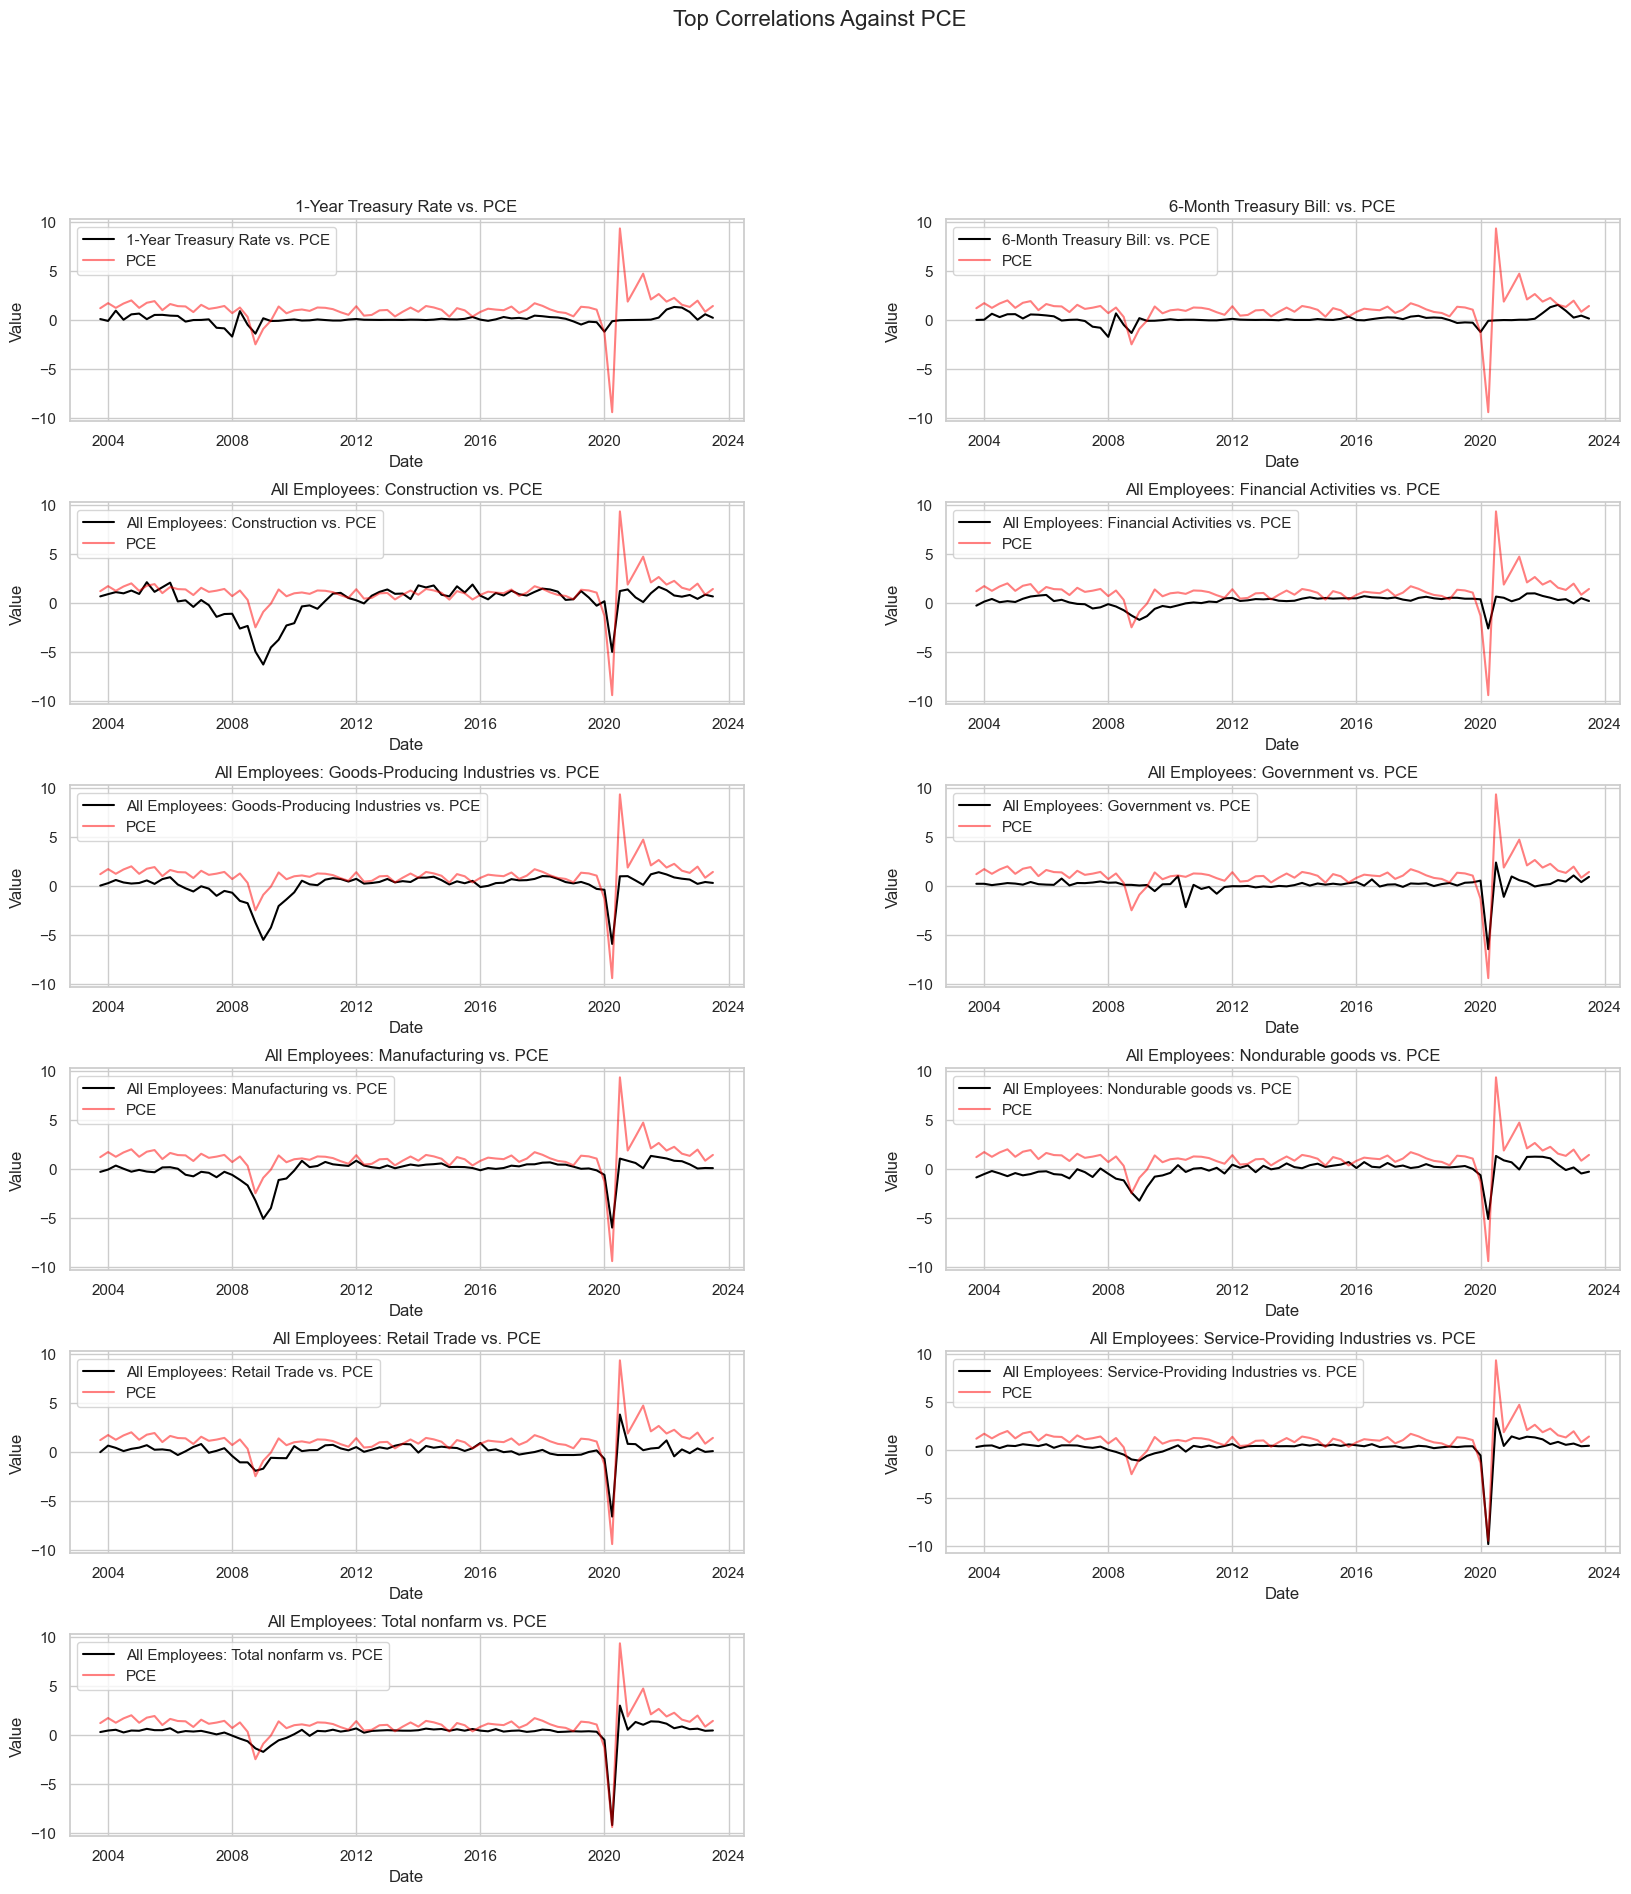

In [29]:
# set Name as index
pce_alternative_proxies.set_index("Name", inplace=True)

top_indicators_against_pce_line_graph(joined_dataset, pce_alternative_proxies)

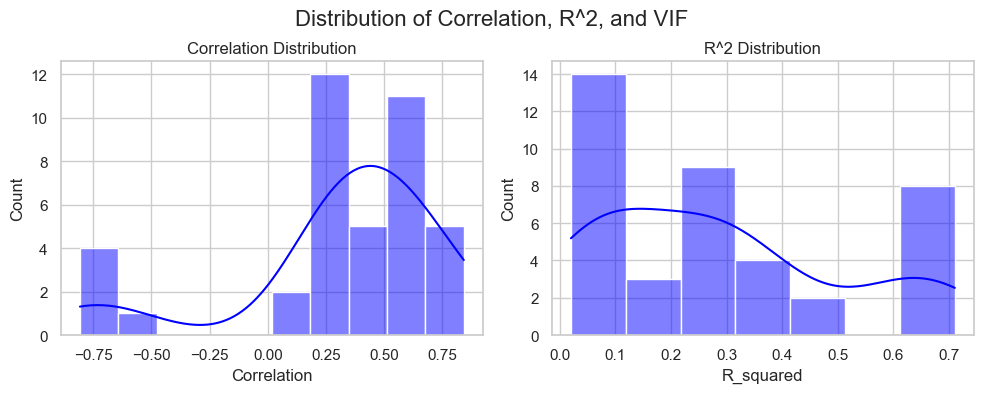

In [30]:
# Create subplots for histograms with smoothed lines
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot Correlation histogram with smoothed line
sns.histplot(adf_results_df["Correlation"], kde=True, color="blue", ax=axes[0])
axes[0].set_title("Correlation Distribution")

# Plot R^2 histogram with smoothed line
sns.histplot(adf_results_df["R_squared"], kde=True, color="blue", ax=axes[1])
axes[1].set_title("R^2 Distribution")

# Customize the overall plot
plt.tight_layout()
plt.suptitle("Distribution of Correlation, R^2, and VIF", fontsize=16)
plt.subplots_adjust(top=0.85)

# Show the plot
plt.show()

<div style="color:#00BFFF">

---

##### Save Data


In [31]:
pce_alternative_proxies.to_csv("./results/final_dataset/pce_alternative_proxies.csv")

In [32]:
final_proxy_dataset.to_csv("./results/final_dataset/final_proxy_dataset.csv")